### Pytorch Quiz
- CNN을 활용한 모델을 만들어서 정확도 95% 이상의 Classifier를 만드세요
- 코드 수정 가능

In [1]:
from matplotlib import pyplot as plt
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader

#### Dataset download

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
dataloader_train = DataLoader(train_data, 
                              batch_size=16, 
                              shuffle=True)

test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
dataloader_test = DataLoader(test_data, 
                              batch_size=16, 
                              shuffle=True)

In [9]:
print(test_data[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

#### Check images

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


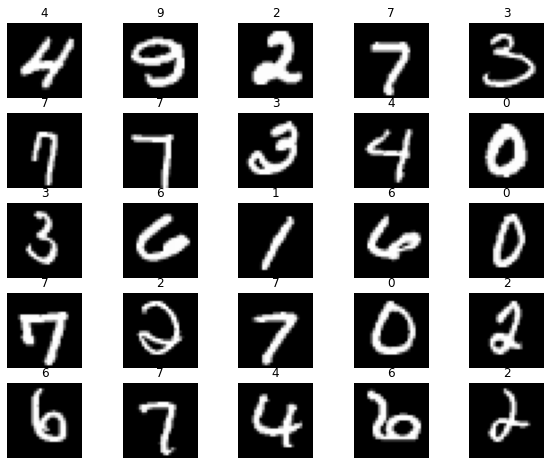

In [11]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    print(img.shape)
plt.show()

#### CNN
##### structure
- Convolution 1 : channels 16, kernel size 5, stride 1, padding 2 (output resolution?)
- ReLU
- MaxPool : kernel_size 2, stride 2
- Convlution 2 : channels 32, kernel size 5, stride 1, padding 2 (output resolution?)
- Linear : output channels 10 

##### https://pytorch.org/docs/1.12/nn.html

In [12]:
class CNN(nn.Module):
    def __init__(self):
        ## TODO ##
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1,
                              out_channels = 16,
                              kernel_size = 5,
                              stride = 2,
                              padding = 2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size = 2,
                                   stride = 2)
        self.conv2 = nn.Conv2d(in_channels = 16,
                              out_channels = 32,
                              kernel_size = 5,
                              stride = 2,
                              padding = 2)
        self.linear = nn.Linear(in_features = 512,
                               out_features = 10)
    def forward(self, x):
        ## TODO ##
        print(x.shape)
        x = self.conv1(x)
        print(x.shape)
        x = self.relu(x)
        print(x.shape)
        x = self.maxpool(x)
        print(x.shape)
        x = self.conv2(x)
        print(x.shape)
        x = x.view(x.shape[0], -1)
        print(x.shape)
        x = self.linear(x)
        print(x.shape)
        return x

x = torch.randn(16,1,28,28)
cnn = CNN()

cnn(x)

torch.Size([16, 1, 28, 28])
torch.Size([16, 16, 14, 14])
torch.Size([16, 16, 14, 14])
torch.Size([16, 16, 7, 7])
torch.Size([16, 32, 4, 4])
torch.Size([16, 512])
torch.Size([16, 10])


tensor([[-0.2039, -0.2802, -0.1158,  0.0122,  0.0084,  0.0942, -0.1519, -0.3365,
          0.1025, -0.0351],
        [-0.2424, -0.2458, -0.0746,  0.0924,  0.1048,  0.1759, -0.1313, -0.3360,
          0.1773,  0.0768],
        [-0.4207, -0.2497, -0.1187,  0.0840,  0.0032,  0.0159,  0.0098, -0.0530,
          0.2459,  0.1856],
        [-0.2110, -0.1826,  0.0225,  0.0567, -0.1171,  0.0236, -0.0193, -0.1841,
          0.2892, -0.0684],
        [-0.0514, -0.0713, -0.0580, -0.0298,  0.1205, -0.0461,  0.0207, -0.2574,
          0.1594, -0.1099],
        [-0.4037, -0.3008, -0.2286,  0.1005,  0.1843,  0.0121, -0.1849, -0.1576,
          0.1329, -0.2884],
        [-0.2302, -0.5200, -0.0059, -0.0809,  0.0373,  0.1495, -0.2597, -0.1358,
          0.2130, -0.0171],
        [-0.3260, -0.1275, -0.2546, -0.0408, -0.0868,  0.0688, -0.1602, -0.0437,
          0.2016, -0.0557],
        [-0.3343, -0.3489,  0.1496, -0.0012,  0.0783,  0.2358, -0.0334, -0.2982,
          0.2539, -0.0263],
        [-0.0796, -

#### Train

In [21]:
cnn = CNN()
loss_func = nn.CrossEntropyLoss()   
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   

In [22]:
# Train the model
num_epochs = 5

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dataloader_train):
        output = cnn(images)
        loss = loss_func(output, labels)

        # clear gradients for this training step   
        optimizer.zero_grad()           

        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()                

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}], Loss: {:.4f}' 
                   .format(epoch + 1, num_epochs, i + 1, loss.item()))

Epoch [1/5], Step [100], Loss: 0.6700
Epoch [1/5], Step [200], Loss: 0.0328
Epoch [1/5], Step [300], Loss: 0.9541
Epoch [1/5], Step [400], Loss: 0.2504
Epoch [1/5], Step [500], Loss: 0.4560
Epoch [1/5], Step [600], Loss: 0.1480
Epoch [1/5], Step [700], Loss: 0.0892
Epoch [1/5], Step [800], Loss: 0.0754
Epoch [1/5], Step [900], Loss: 0.0592
Epoch [1/5], Step [1000], Loss: 0.9024
Epoch [1/5], Step [1100], Loss: 0.5669
Epoch [1/5], Step [1200], Loss: 0.5256
Epoch [1/5], Step [1300], Loss: 0.1333
Epoch [1/5], Step [1400], Loss: 0.9056
Epoch [1/5], Step [1500], Loss: 0.1005
Epoch [1/5], Step [1600], Loss: 0.0659
Epoch [1/5], Step [1700], Loss: 0.0487
Epoch [1/5], Step [1800], Loss: 0.4310
Epoch [1/5], Step [1900], Loss: 0.6770
Epoch [1/5], Step [2000], Loss: 0.1296
Epoch [1/5], Step [2100], Loss: 0.1242
Epoch [1/5], Step [2200], Loss: 0.1029
Epoch [1/5], Step [2300], Loss: 0.2107
Epoch [1/5], Step [2400], Loss: 0.2346
Epoch [1/5], Step [2500], Loss: 0.1240
Epoch [1/5], Step [2600], Loss: 0.

#### Test

In [24]:
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader_test:
#         test_output, last_layer = cnn(images)
        test_output = cnn(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        correct += (pred_y == labels).sum().item()
        total += labels.size(0)
    accuracy = correct / total * 100
    
print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

Test Accuracy of the model on the 10000 test images: 94.68 Percent
